In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
P1=[0.1,0.6]
P2=[0.15,0.71]
P3=[0.08,0.9]
P4=[0.16, 0.85]
P5=[0.2,0.3]
P6=[0.25,0.5]
P7=[0.24,0.1]
P8=[0.3,0.2]

K = 2

points = [P1, P2, P3, P4, P5, P6, P7, P8]

Centroid : 
 [[0.148      0.712     ]
 [0.24666667 0.2       ]]
Labels :  [0 0 0 0 1 0 1 1]


c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1148: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


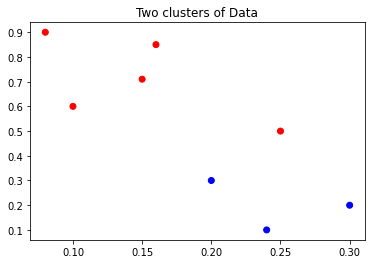

In [137]:
# K-means using sklearn

from sklearn.cluster import KMeans

tot_num_points = 8
cluster_centers =[(0.1, 0.6), (0.3, 0.2)]
num_classes = len(cluster_centers)
X = np.array(points)

init_centroids = []
init_centroids.append(P1)
init_centroids.append(P8)
init_centroids_arr = np.array(init_centroids)
kmeans = KMeans(init=init_centroids_arr, n_clusters=num_classes)

# kmeans = KMeans(init="k-means++", n_clusters=num_classes)

kmeans.fit(X)

P = kmeans.predict(X)

print("Centroid : \n", kmeans.cluster_centers_)
print("Labels : ", kmeans.labels_)

colors = list(map(lambda x: 'blue' if x==1 else 'red', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title("Two clusters of Data")

plt.show()

In [138]:
# Implementing K-means
import math

# def dist(A, B):
#     xd = (A[0]-B[0])**2
#     yd = (A[1]-B[1])**2
    
#     d = math.sqrt(xd+yd)
    
#     return d


def dist(A, B):
    S = 0
    for i in range(len(A)):
        S += math.pow(A[i]-B[i], 2)
        
    
    d = math.sqrt(S)
    
    return d

In [139]:
def cluster(C1, C2):
    c1 = C1
    c2 = C2
    
    cluster1 = list()
    cluster2 = list()
    
    for p in points:
        d1 = dist(p, C1)
        d2 = dist(p, C2)
        
        if d1<d2:
            cluster1.append(p)
        else:
            cluster2.append(p)
            
    
    x1 = 0
    y1 = 0
    
    for i in cluster1:
        x1 = x1 + i[0]
        y1 = y1 + i[1]
        
    x1 = x1/len(cluster1)
    y1 = y1/len(cluster1)
    
    centroid1 = [x1, y1]
    
    
    x2 = 0
    y2 = 0
    
    for i in cluster2:
        x2 = x2 + i[0]
        y2 = y2 + i[1]
        
    x2 = x2/len(cluster2)
    y2 = y2/len(cluster2)
    
    centroid2 = [x2, y2]
    
    
    C1 = centroid1
    C2 = centroid2
    
    if centroid1[0] == c1[0] and centroid1[1] == c1[1] and centroid2[0] == c2[0] and centroid2[1] == c2[1]:
        print("Clusters are : ")
        print(cluster1)
        print(cluster2)
        
        if(P6 in cluster1):
            print("P6 belongs to Cluster 1")
        elif(P6 in cluster2):
            print("P6 belongs to Cluster 2")
            
        print("Population of cluster around m2 : ", len(cluster2))
        
        print("\nUpdated values of m1 and m2:")
        print("m1/C1 : ", C1)
        print("m2/C2 : ", C2)
        
        
        P = list()
        
        for i in points:
            if i in cluster1:
                P.append(0)
            else:
                P.append(1)
                
        X = np.array(points)
        
        C = []
        C.append(C1)
        C.append(C2)
        C_p = np.array(C)
        
        
        print("\nData Points and centroids after Clustering:")
        
        colors = list(map(lambda x: 'blue' if x==1 else 'red', P))
        plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
        plt.scatter(C_p[:,0], C_p[:,1], c='g', marker = 'x')
        plt.title("Two clusters of Data")

        plt.show()
        
    else:
        cluster(C1, C2)

Initial Data Points and centroids :



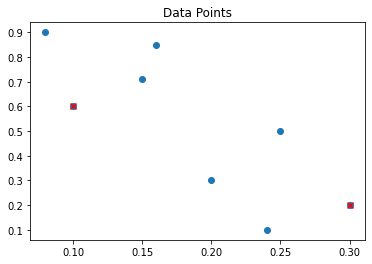

Points are : 
 [[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]]
Clusters are : 
[[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85], [0.25, 0.5]]
[[0.2, 0.3], [0.24, 0.1], [0.3, 0.2]]
P6 belongs to Cluster 1
Population of cluster around m2 :  3

Updated values of m1 and m2:
m1/C1 :  [0.148, 0.712]
m2/C2 :  [0.24666666666666667, 0.20000000000000004]

Data Points and centroids after Clustering:


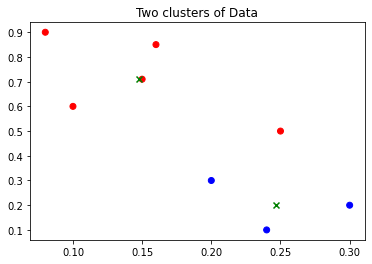

In [140]:
C1 = P1
C2 = P8

C = []
C.append(C1)
C.append(C2)
C_p = np.array(C)

print("Initial Data Points and centroids :\n")
plt.scatter(X[:,0], X[:,1], marker="o", picker=True)
plt.scatter(C_p[:,0], C_p[:,1], c='r', marker = 'x')
plt.title("Data Points")

plt.show()

print("Points are : \n", points)

cluster(C1, C2)